# Pymaceuticals Inc.
---

### Analysis
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how= "right")

# display the first five rows of the combined data
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [3]:
#output the number of mice
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the first five rows of the cleaned DataFrame for a preview
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_number_of_mice = cleaned_data["Mouse ID"].nunique()
cleaned_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Group the data by the 'Drug Regimen' column first
regimen_group = cleaned_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen using the already grouped data
mean = regimen_group['Tumor Volume (mm3)'].mean()
median = regimen_group['Tumor Volume (mm3)'].median()
variance = regimen_group['Tumor Volume (mm3)'].var()
std_deviation = regimen_group['Tumor Volume (mm3)'].std()
sem = regimen_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_statistics_df = pd.DataFrame({
    'Mean Tumour Volume': mean,
    'Median Tumour Volume': median,
    'Tumour Volume Variance': variance,
    'Tumour Volume STD.DEV': std_deviation,
    'Tumour Volume Std.Err.': sem
})

# Display the summary statistics DataFrame
summary_statistics_df



,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Volume STD.DEV,Tumour Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

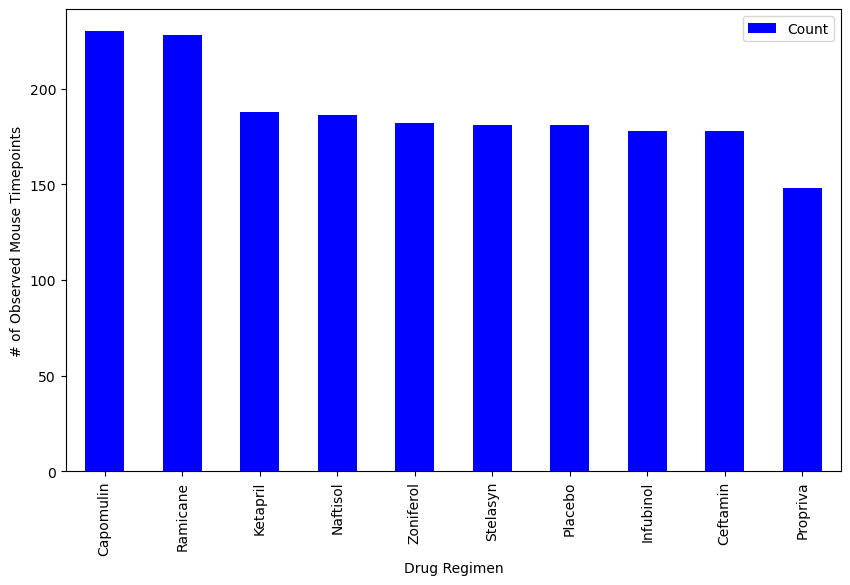

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()
regimen_counts_df = pd.DataFrame({'Drug Regimen': regimen_counts.index, 'Count': regimen_counts.values})

# Create a bar plot using Pandas
regimen_counts_df.plot(kind='bar', x='Drug Regimen', y='Count', color='blue', figsize=(10, 6))

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

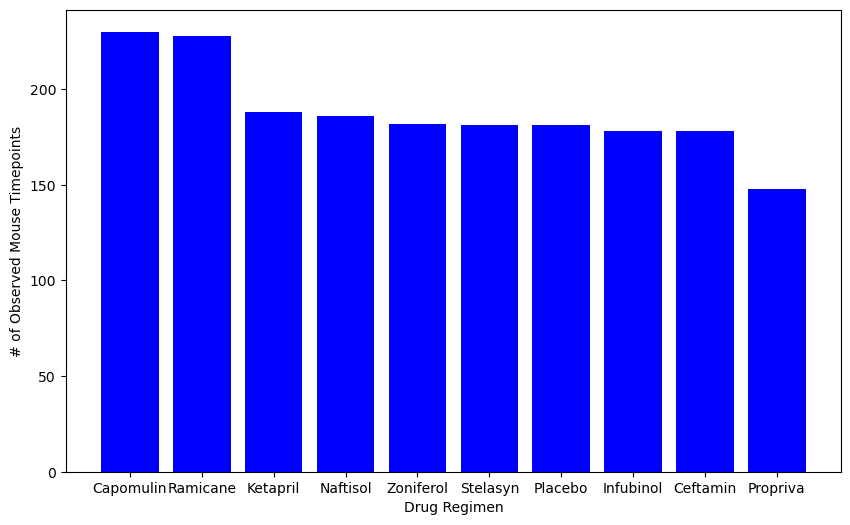

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Extract the drug regimens and their corresponding counts
regimens = regimen_counts.index
count_values = regimen_counts.values

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimens, count_values, color='blue')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


# Show the plot
plt.show()








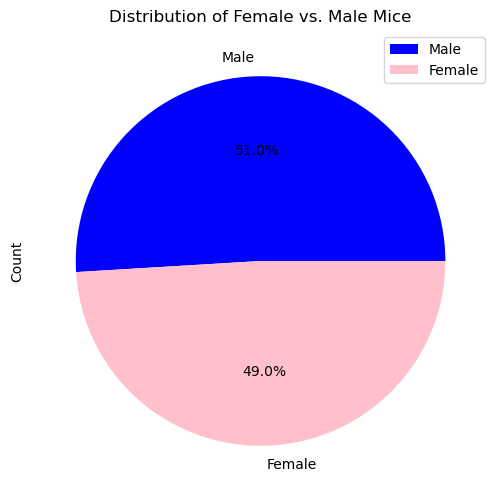

In [22]:
# Group the data by 'Sex' and count the number of mice in each group
sex_counts = cleaned_data['Sex'].value_counts()

# Create a DataFrame from the grouped counts
sex_counts_df = pd.DataFrame({'Sex': sex_counts.index, 'Count': sex_counts.values})

# Create a pie plot using Pandas
sex_counts_df.set_index('Sex', inplace=True)
sex_counts_df.plot(kind='pie', y='Count', autopct='%1.1f%%', colors=['blue', 'pink'], startangle=360, figsize=(6, 6))

# Set plot title
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

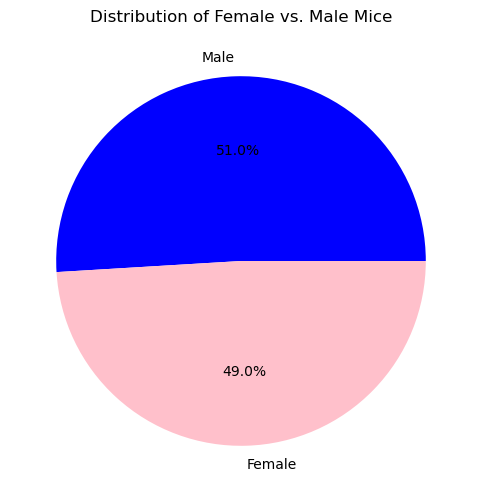

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Labels for the pie chart
labels = sex_counts.index

# Data values for the pie chart
sizes = sex_counts.values

# Colors for the pie chart
colors = ['blue', 'pink']

# Create a pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=360)

# Set plot title
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# List of the four treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data to include only the specified treatment regimens
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatment_regimens)]

# Find the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the DataFrame with the final tumor volumes
final_tumor_volume.head()




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Locate the rows which contain mice on each drug and get the tumor volumes      
    # Determine outliers using upper and lower bounds
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in treatments:
    regimen_data = cleaned_data[cleaned_data['Drug Regimen'] == regimen]
    tumor_volumes = regimen_data['Tumor Volume (mm3)']
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    tumor_vol_data.extend(outliers)
    print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


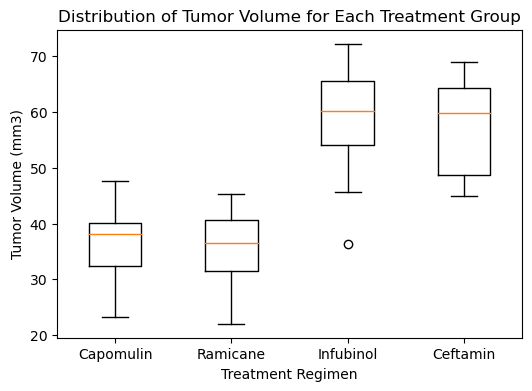

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Loop through each treatment regimen and collect tumor volume data
# Create an empty list to store tumor volume data for each regimen
tumor_vol_data = []

# Loop through each treatment regimen and collect tumor volume data
for regimen in treatment_regimens:
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)

# Create a box plot
plt.figure(figsize=(6, 4))
plt.boxplot(tumor_vol_data, labels=treatment_regimens)


# Set plot labels and title
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

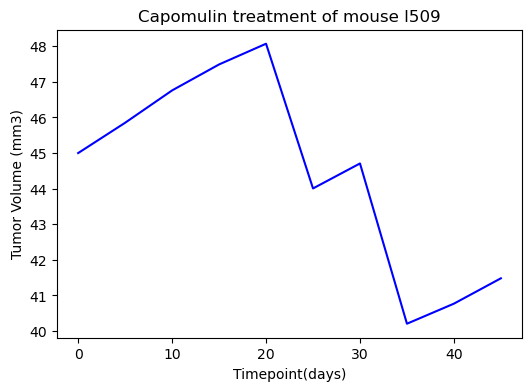

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a specific mouse treated with Capomulin (replace 'YourMouseID' with the actual Mouse ID)

# Filter the data for the selected mouse and Capomulin regimen
selected_mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == 'l509') & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(6, 4))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], color='b')

# Set plot labels and title
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')


# Show the plot
plt.show()

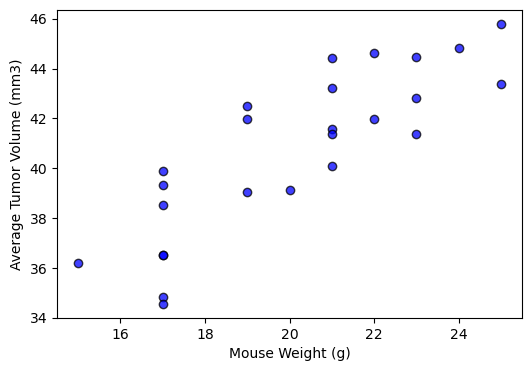

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID to calculate the average tumor volume and weight
avg_tumor_weight_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Create a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(avg_tumor_weight_data['Weight (g)'], avg_tumor_weight_data['Tumor Volume (mm3)'], color='b', marker='o', edgecolors='black', alpha=0.75)

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


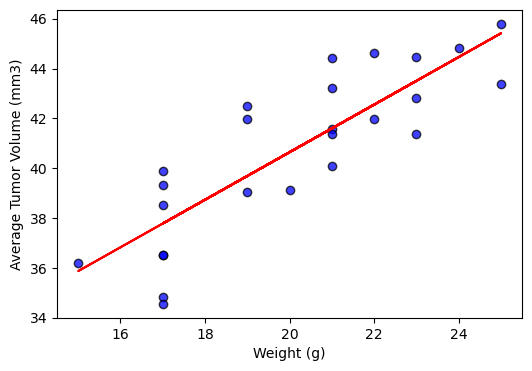

In [18]:
from scipy.stats import linregress
#Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient = avg_tumor_weight_data['Weight (g)'].corr(avg_tumor_weight_data['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_weight_data['Weight (g)'], avg_tumor_weight_data['Tumor Volume (mm3)'])

# Create a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(avg_tumor_weight_data['Weight (g)'], avg_tumor_weight_data['Tumor Volume (mm3)'], color='b', marker='o', edgecolors='black', alpha=0.75)

# Add the regression line to the plot
plt.plot(avg_tumor_weight_data['Weight (g)'], intercept + slope * avg_tumor_weight_data['Weight (g)'], color='red')

# Set plot labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Show the correlation coefficient on the plot
#plt.text(20, 38, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='black')

print(f'The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}')

# Show the plot
plt.show()

### Analysis Report

After a careful analysis of the data from Pymaceutical Inc. The following dact can be deduced:

A correlation between mouse weight and the average tumor volume of 0.84 indicates a strong positive linear relationship between mouse weight and the average tumor volume. 

A correlation coefficient of 0.84 is positive, which means that as mouse weight increases, the average tumor volume tends to increase as well. In other words, there is a tendency for heavier mice to have larger average tumor volumes. The two variables move in the same direction. When one variable (mouse weight) increases, the other variable (average tumor volume) also tends to increase.

According to this analysis, in practical terms, this correlation could mean that there is a strong tendency for mice with higher weights to develop larger average tumor volumes.